# Supervised Learning on the Titanic Dataset

In [7]:
import pandas as pd

In [8]:
data = pd.read_csv('titanic/train.csv')

In [9]:
df = pd.DataFrame(data)

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df[df['Survived'] < 0]['Survived']

Series([], Name: Survived, dtype: int64)

In [15]:
df['Age'] = df['Age'].fillna(-1)

In [16]:
df['Age'][:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    -1.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [17]:
df['Cabin'] = df['Cabin'].fillna('N0')

In [18]:
df[df['Cabin'] == 'N0']['Cabin'].count()

687

In [19]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [20]:
df = pd.get_dummies(df, columns=['Embarked', 'Sex'], drop_first=False)

In [21]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,N0,False,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,N0,False,False,True,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,N0,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,N0,False,False,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,False,False,True,True,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",-1.0,1,2,W./C. 6607,23.4500,N0,False,False,True,True,False
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,True,False,False,False,True


In [22]:
FamilySize = df['SibSp'] + df['Parch']

In [23]:
df['FamilySize'] = FamilySize

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,N0,False,False,True,False,True,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,False,True,False,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,N0,False,False,True,True,False,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True,True,False,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,N0,False,False,True,False,True,0


In [25]:
df['isAlone'] = 0

In [26]:
df.loc[df['FamilySize'] == 0, 'isAlone'] = 1

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,FamilySize,isAlone
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,N0,False,False,True,False,True,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,False,True,False,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,N0,False,False,True,True,False,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True,True,False,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,N0,False,False,True,False,True,0,1


In [28]:
df['Titles'] = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)

In [29]:
import numpy as np

In [30]:
df['Fare Per Person'] = np.where(df['FamilySize'] != 0, df['Fare'] / (df['FamilySize'] + 1), df['Fare'])

In [31]:
df['Titles'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [32]:
df = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'Titles'], axis=1)

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [36]:
X_train, y_train, X_val, y_val = train_test_split(X, y, train_size=0.2, random_state=42)

In [37]:
y_train.shape

(713, 13)

In [38]:
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))

print("\nValidation set class distribution:")
print(y_val.value_counts(normalize=True))


Training set class distribution:
Pclass  Age       SibSp  Parch  Fare      Embarked_C  Embarked_Q  Embarked_S  Sex_female  Sex_male  FamilySize  isAlone  Fare Per Person
3       0.000000  0      0      0.015412  False       False       True        False       True      0           1        7.895800           0.016830
                                0.015127  False       True        False       False       True      0           1        7.750000           0.009818
                                0.015713  False       False       True        False       True      0           1        8.050000           0.009818
                                0.015127  False       True        False       True        False     0           1        7.750000           0.007013
                                0.014102  True        False       False       False       True      0           1        7.225000           0.007013
                                                                                     

In [39]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

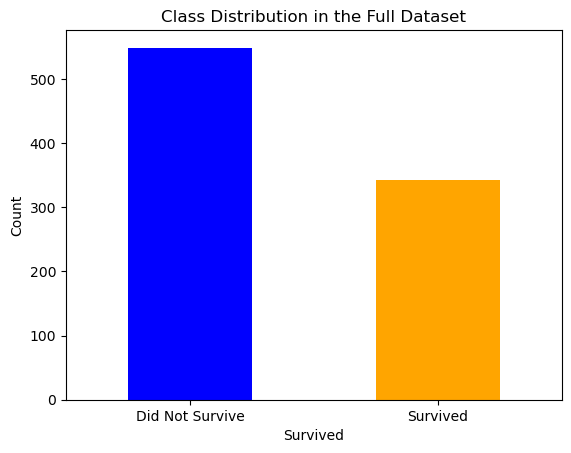

In [40]:
import matplotlib.pyplot as plt

# Plot distribution
df['Survived'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Class Distribution in the Full Dataset")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.xticks([0, 1], labels=['Did Not Survive', 'Survived'], rotation=0)
plt.show()


# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,FamilySize,isAlone,Fare Per Person
0,0,3,0.283951,1,0,0.014151,False,False,True,False,True,1,0,3.62500
1,1,1,0.481481,1,0,0.139136,True,False,False,True,False,1,0,35.64165
2,1,3,0.333333,0,0,0.015469,False,False,True,True,False,0,1,7.92500
3,1,1,0.444444,1,0,0.103644,False,False,True,True,False,1,0,26.55000
4,0,3,0.444444,0,0,0.015713,False,False,True,False,True,0,1,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0.345679,0,0,0.025374,False,False,True,False,True,0,1,13.00000
887,1,1,0.246914,0,0,0.058556,False,False,True,True,False,0,1,30.00000
888,0,3,0.000000,1,2,0.045771,False,False,True,True,False,3,0,5.86250
889,1,1,0.333333,0,0,0.058556,True,False,False,False,True,0,1,30.00000


In [60]:
logistic_model = LogisticRegression(random_state=42, max_iter=20000)

logistic_model.fit(X_train, y_train)

y_pred_log = logistic_model.predict(X_val)
accuracy_log = logistic_model.score(X_val, y_val)
print(f"Logistic Regression Accuracy: {accuracy_log:.2f}")

Logistic Regression Accuracy: 0.81


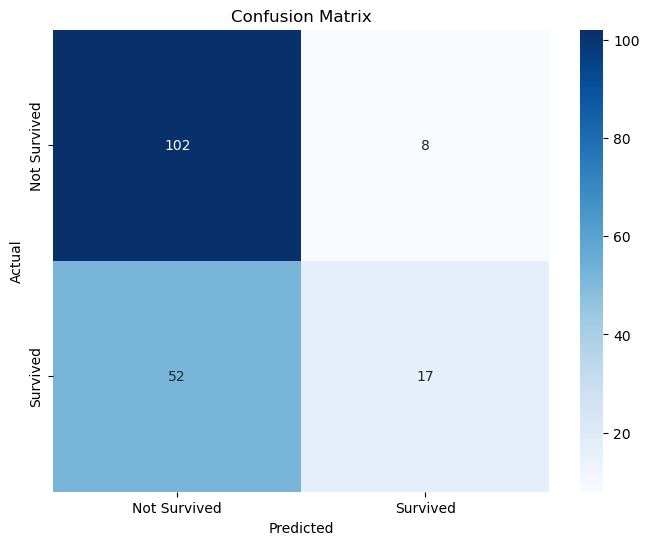

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_log)

# Plot the matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


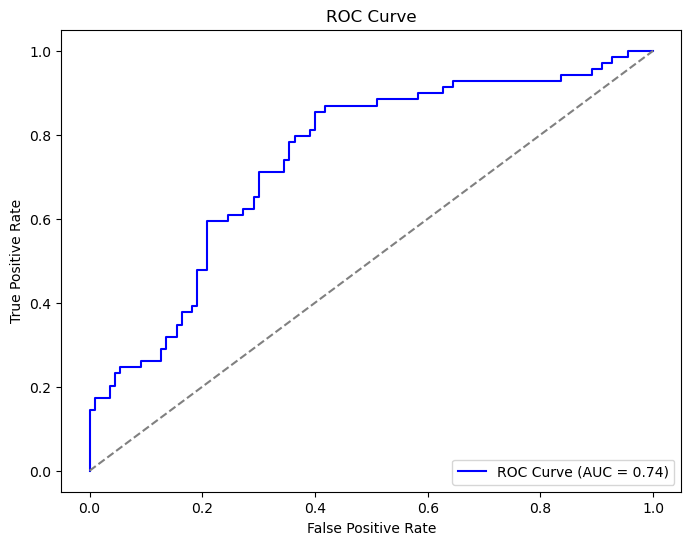

In [45]:
from sklearn.metrics import roc_curve, auc

# Get the probabilities
y_proba = logistic_model.predict_proba(X_val)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


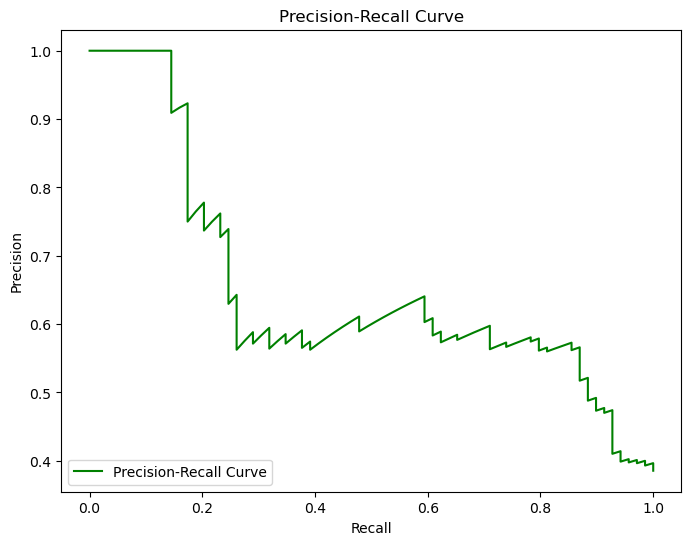

In [46]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_val, y_proba)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


# Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_val)
accuracy_dt = dt_model.score(X_val, y_val)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

Decision Tree Accuracy: 0.76


In [48]:
y_pred_dt

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0])

# Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_val)
accuracy_rf = rf_model.score(X_val, y_val)
print(f"Random Forest Model Accuracy: {accuracy_rf: .3f}")

Random Forest Model Accuracy:  0.821


# Support Vector Machine

In [50]:
from sklearn.svm import SVC

svc = SVC(random_state=42)

svc.fit(X_train, y_train)

pred_svc = svc.predict(X_val)
accuracy_scv = svc.score(X_val, y_val)
print(f"Support Vector Machine Accuracy: {accuracy_scv: .3f}")

Support Vector Machine Accuracy:  0.631


# XGBoost

In [54]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)

xgb_model.fit(X_train, y_train)

pred_xgb = xgb_model.predict(X_val)
accuracy_xgb = xgb_model.score(X_val, y_val)
print(f"XGB accuracy: {accuracy_xgb: .3f}")

XGB accuracy:  0.793
